**ATOC4500 Data Science Lab - Lecture #3 Notebook** 

*last updated: January 20, 2022 after class* 

*Written by Prof. Kay (Jennifer.E.Kay@colorado.edu)*

In [ ]:
## Load Python Packages

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # library for data analysis for text files (everything but netcdf files)

In [ ]:
## Example #1 - What percentage of a normally distributed dataset is 
## within one standard deviation of the mean?

answer=stats.norm.cdf(1,loc=0,scale=1)-stats.norm.cdf(-1,loc=0,scale=1)
print('answer:',np.str(np.round(answer*100,1)),'%')


answer: 68.3 %


In [ ]:
## Example #2 - Assume: ENSO index is standard normal
## What is the probability that the average 2011-2013 monthly ENSO index was
## 0.5 or greater assuming that ENSO dynamics have not changed?

population_mean=0
population_std=1
sample_mean=0.5     ## average monthly ENSO index for 2011-2013
N=36                ## number of samples, here number of months
stderrormean=(population_std)/np.sqrt(N)
z=(sample_mean-population_mean)/stderrormean
print('z:',np.str(z))

value=(1-stats.norm.cdf(z,loc=0, scale=1))*100
print('% data with z value greater than z:',np.str(np.round(value,1))+'%')

z: 3.0
% data with z value greater than z: 0.1%


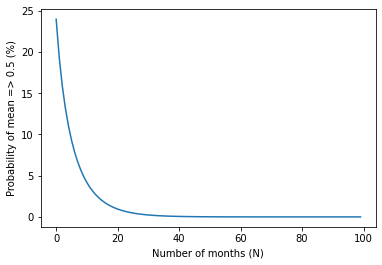

In [ ]:
## Example #2 cont. - How does the probability that 
## the mean monthly ENSO index was 0.5 or greater 
## depend on the number of months?

population_mean=0
population_std=1
sample_mean=0.5

N=1
prob=[]
for i in np.arange(0,100):
  N=N+1
  #print(N)
  stderrormean=(population_std)/np.sqrt(N)    
  z=(sample_mean-population_mean)/stderrormean
  prob.append((1-stats.norm.cdf(z,loc=0, scale=1))*100)

plt.plot(prob);
plt.ylabel('Probability of mean => 0.5 (%)');
plt.xlabel('Number of months (N)');

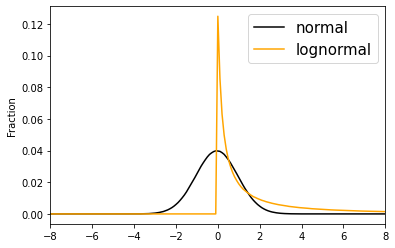

In [ ]:
## Example #3 - Central Limit Theorem

### Plot Two Distributions - Normal in black, Lognormal in orange
N0 = 10000000
bins=np.arange(-10,10.1,.1)

Rblack = np.random.normal(0,1,size=(N0,))
Rorange= np.random.lognormal(0.,2.,size=(N0,))

hx = np.histogram(Rblack,bins)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='black',label='normal')
hx = np.histogram(Rorange,bins)
plt.plot(hx[1][:-1],hx[0]/float(N0),'-',color='orange',label='lognormal')

plt.legend(fontsize = 15)
plt.ylabel('Fraction')
plt.xlim(-8,8);

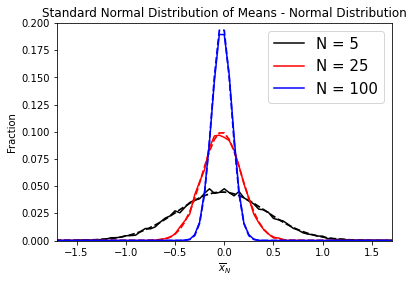

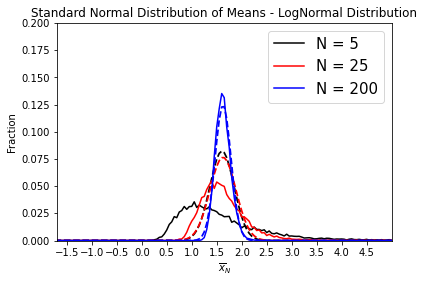

In [ ]:
### Test Central Limit Theorem with a Normal Distribution
# Compare randomly draw of values from normal distribution (solid) 
# with z-statistics calculation (dashed) for increasing N.
# Distribution narrows and approaches true mean (0) as N increases.

bin_width = .05
for N in (5, 25, 100):
    y2 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'red'
    elif(N==100):
        clr = 'blue'            
    for i in np.arange(0,10000):    
        y2.append(np.mean(np.random.normal(loc = 0, scale = 1., size = N)))            
    # calc histograms
    bins = np.arange(-8,8,0.05)
    y2hist, x = np.histogram(y2,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y2hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = 0, 
      scale = 1./np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,2,.5))
plt.xlim(-1.7,1.7)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('Fraction')
plt.ylim(0,0.2)
plt.legend(fontsize = 15)
plt.title('Standard Normal Distribution of Means - Normal Distribution');
plt.show()

### Test Central Limit Theorem with a LogNormal Distribution
# same as above, but now with random draw from lognormal distribution (solid)
bin_width = .05
for N in (5, 25, 200):
    y3 = []
    if(N == 5):
        clr = 'black'
    elif(N==25):
        clr = 'red'
    elif(N==200):
        clr = 'blue'            
    for i in np.arange(0,10000):    
        y3.append(np.mean(np.random.lognormal(mean = 0, sigma = 1, size = N)))          
    # calc histograms
    bins = np.arange(-8,8,bin_width)
    y3hist, x = np.histogram(y3,bins = bins)    
    x = bins[0:-1]
    plt.plot(x,y3hist/(float(len(y2))), color = clr, label = 'N = ' + str(N))
    sigma_y3 = np.std(np.random.lognormal(mean = 0, sigma = 1, size = N))
    plt.plot(x,(bin_width)*stats.norm.pdf(x+bin_width/2, loc = np.mean(y3), scale = sigma_y3/np.sqrt(N)), color = clr, linestyle = '--', linewidth = 1.75)
plt.xticks(np.arange(-10,10,2))
plt.xticks(np.arange(-2,5,.5))
plt.xlim(-1.7,5)
plt.ylim(0,0.2)
plt.xlabel(r'$\overline{x}_N$')
plt.ylabel('Fraction')
plt.legend(fontsize = 15)
plt.title('Standard Normal Distribution of Means - LogNormal Distribution');

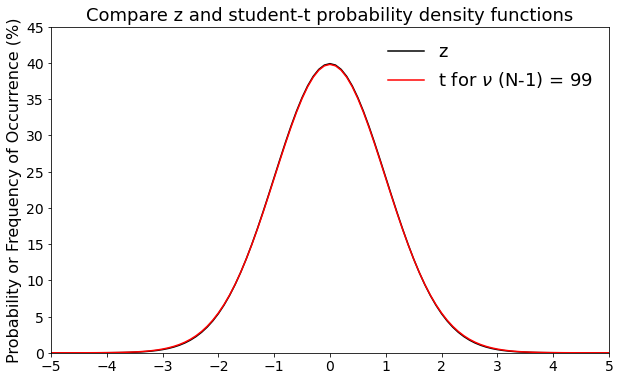

In [ ]:
## Example #4 - Compare z distribution with t distribution for a given N

N = 100 ### CHANGE ME, see the impact on the width of the t distribution
df = N-1  ## degrees of freedom
x = np.arange(-6,6.1,.1)
z = stats.norm.pdf(x,0,1)*100
t = stats.t.pdf(x,df)*100

f=plt.figure(figsize=(10,6))
plt.plot(x,z,color='black',label='z');
plt.plot(x,t,color='red',label=r"t for $\nu$ (N-1) = "+str(df));

plt.title('Compare z and student-t probability density functions',fontsize=18)
plt.ylabel('Probability or Frequency of Occurrence (%)',fontsize=16)
plt.legend(frameon = 0,fontsize=18)

plt.xlim(-5,5);
plt.xticks(np.arange(-5,6,1),fontsize=14);
plt.ylim(0,45);
plt.yticks(np.arange(0,50,5),fontsize=14);

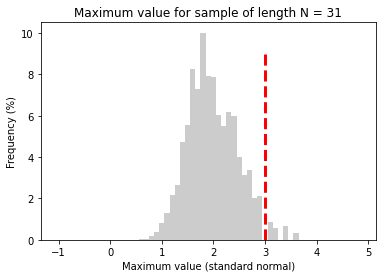

In [ ]:
## Example #5 - Monte Carlo

# In January (31 days), the maximum daily temperature was 2.2 standard 
# deviations away from the climatological mean temperature.  If we assume that 
# the daily temperature is normally distributed, how rare is it to have a 
# maximum of 2.2 standard deviations or greater in 31 daily samples?

# Since our null hypothesis is that the values come from a standard normal, 
# we can create synthetic data to determine the confidence interval on the 
# maximum in a sample of N=31.  In other words - Let's Monte Carlo It!

bin_width = .1
drawn_max = 3.0
sample_length = 31

Z = np.random.randn(10000,1)
MC = np.empty([100000, 1]); ## monte carlo 

for iloop in range(100000):
    ip = np.random.randint(low=0,high=Z.shape[0],size=sample_length) 
    MC[iloop] = np.max(Z[ip])

bin_list = np.arange(-1,5,bin_width);
n, bins = np.histogram(MC, bins=bin_list, density=False);
plt.plot([drawn_max, drawn_max],[0, 9],color='red',linewidth=3,linestyle='--');
plt.bar(bins[0:-1],(n/float(len(MC)))*100,bin_width,facecolor='grey',alpha=0.4);

plt.xlabel('Maximum value (standard normal)');
plt.ylabel('Frequency (%)');
titlename = 'Maximum value for sample of length N = ' + str(sample_length);
plt.title(titlename);